In [1]:
from itertools import combinations
from operator import itemgetter
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
customer_df = pd.read_csv('customerdata.csv',low_memory=False)
customer_df.head()

,name,DELIVERY_DATE,CUSTOMER_ID,id,TIME_CREATED,product_item_id,PRODUCT_NAME,CATEGORY,QUANTITY,DELIVERY_QUANTITY,status,COMPLAINT_REASON,UNIT_MEASURE,code,PACKAGING,MRP,UNIT_PRICE,DISCOUNT
0,Bangalore,2021-03-07T00:00:00.000+05:30,24,23181828,2021-03-06T07:15:05.000+05:30,41534,Nandini Shubham-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,22.0,22.0,0.0
1,Bangalore,2021-03-07T00:00:00.000+05:30,24,23181828,2021-03-06T07:15:05.000+05:30,41540,Nandini Toned Milk-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,19.0,19.0,0.0
2,Bangalore,2021-03-07T00:00:00.000+05:30,33,23181829,2021-03-06T07:15:05.000+05:30,41569,Heritage Toned Milk-500ML Pouch,Milk,3,3,DELIVERED,NaN,500.0,ML,Pouch,21.0,21.0,0.0
3,Bangalore,2021-03-07T00:00:00.000+05:30,144,23181830,2021-03-06T07:15:05.000+05:30,41531,Heritage Full Cream Milk-500ML Pouch,Milk,2,2,DELIVERED,NaN,500.0,ML,Pouch,26.0,26.0,0.0
4,Bangalore,2021-03-07T00:00:00.000+05:30,144,23181830,2021-03-06T07:15:05.000+05:30,41536,Nandini Samrudhi-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,23.0,23.0,0.0


In [3]:
item_purchase_df=pd.pivot_table(customer_df,index='CUSTOMER_ID',columns=['PRODUCT_NAME'],values='QUANTITY',aggfunc='sum')

item_purchase_df

PRODUCT_NAME,Happy Milk Organic Mozzarella Cheese-200G,Om Bhakti Wick For Diya Cotton Flower Batti-100PER PACK Pouch,Pro Nature Organic Tur Dal-1KG Pouch,18HERBS Organics A2 Desi Cow Ghee-200ML Glass Bottle,18HERBS Organics Dia Health Tea Bags-17PCS Box,18HERBS Organics Green Tea With Amla Tea Bags-17PCS Box,18HERBS Organics Green Tea With Tulsi Tea Bags-17PCS Box,18HERBS Organics Hibiscus Tea Bags-12PCS Box,18HERBS Organics Laxa Health Tea Bags-17PCS Box,18HERBS Organics Premium Black Tea-250G Box,...,Yam -250G Net Bag,Yam -500G Net Bag,Yam-500G Net Bag,Zandu Sona Chandi Chyawanprash-450G Bottle,Zevic 70% Dark Belgian Chocolate With Stevia-40G Box,Zucchini Green-250G Net Bag,Zucchini Green-500G Net Bag,Zucchini Yellow-250G Net Bag,Zucchini Yellow-500G,Zucchini Yellow-500G Net Bag
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
trX=item_purchase_df.values
trX[0:5]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [7]:
hiddenUnits = 20
visibleUnits =  len(item_purchase_df.columns)

vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32) #Number of unique movies
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) #Number of features we're going to learn
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [8]:
v0 = tf.zeros([visibleUnits], tf.float32)
#testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [9]:
#Phase 1: Input Processing
#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

#printing output of zeros input
h0 = hidden_layer(v0, W, hb)
print("first 15 hidden states: ", h0[0][0:15])

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (2795,)
v1 state shape:   (2795,)


In [10]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.48765653


Epoch: 1 batch #: 0  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 1  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 2  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 3  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 4  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 5  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 6  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 7  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 8  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 9  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 10  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 11  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 12  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 13  of 141 sample #: 299 reconstruction error: nan
Epoch: 1 batch #: 14  of 141 sample #: 299 r

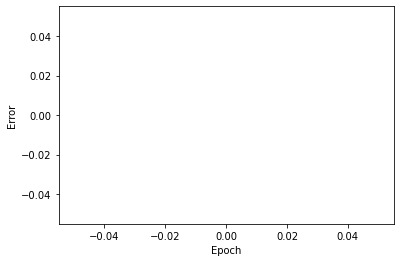

In [11]:
epochs = 5
batchsize = 300
errors = []
weights = []
K=1
alpha = 0.1

#creating datasets
train_ds =tf.data.Dataset.from_tensor_slices((np.float32(trX))).batch(batchsize)



#for i in range(epochs):
#    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
#        batch = trX[start:end]
#        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        prv_w = cur_w
#        prv_vb = cur_vb
#        prv_hb = cur_hb
#    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
#    print (errors[-1])
v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1), 
                       "batch #: %i " % batch_number, "of %i" % (len(trX)/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1




plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()